## model_XGBoost_regression 200 inscrit200 FINAL

Attention grid search ne tourne pas !!! (plus)

## IMPORT

In [105]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np

import random 

import matplotlib.pyplot as plt

In [106]:
# IMPORT M.L
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report

import xgboost as xgb

In [107]:
# DATABES SQLITE
from sqlalchemy import create_engine, Column, Integer, String, MetaData, Table, update, select
db_path = '../DATA/HistoPlotik.db'
engine = create_engine(f'sqlite:///{db_path}')
metadata = MetaData()

tbl_db_names = metadata.tables.keys()
tbl_db_names

dict_keys([])

### IMPORTS CSV SOURCES

In [108]:
file_path='../DATA/final_DATA.csv'
df = pd.read_csv(file_path, encoding='utf-8', sep=';', index_col=0, low_memory=False)
df.shape

(33803, 268)

In [109]:
file_path='../DATA/final_4first_col.csv'
df_info = pd.read_csv(file_path, encoding='utf-8', sep=';', index_col=0, low_memory=False)
df_info.shape


(33803, 4)

In [110]:
df_info.head(5)

,dep,nomdep,codecommune,nomcommune
key,,,,
01001,01,AIN,01001,L'ABERGEMENT-CLÉMENCIAT
01002,01,AIN,01002,L'ABERGEMENT-DE-VAREY
01004,01,AIN,01004,AMBÉRIEU-EN-BUGEY
01005,01,AIN,01005,AMBÉRIEUX-EN-DOMBES
01006,01,AIN,01006,AMBLÉON


In [111]:
df.head()

,TAR_inscrits,TAR_votants,TAR_exprimes,YYY_pvoixNUP,YYY_pvoixECO,YYY_pvoixENS,TAR_electeurs,YYY_pvoixLR_UDI,YYY_pvoixEXTREMD,YYY_pvoixCENTRE,...,TER_surf68,NAT_petranger22,NAT_pimmigre22,NAT_pimmnatur22,NAT_pnatur22,NAT_petranger12,NAT_pimmigre12,NAT_pimmnatur12,NAT_petranger02,NAT_petranger92
0,644.0,343.0,339.0,0.153392,0.023599,0.147493,644.0000,0.271386,0.318584,0.073746,...,0.0,0.005161,0.014194,0.009032,0.014194,0.025740,0.037323,0.011583,0.018543,0.014634
1,218.0,133.0,128.0,0.343750,0.000000,0.000000,218.0000,0.109375,0.078125,0.437500,...,0.0,0.003891,0.003891,0.000000,0.000000,0.012766,0.021277,0.008511,0.005618,0.037736
2,8844.0,4123.0,4012.0,0.298106,0.000000,0.000000,9887.9053,0.087488,0.262961,0.321037,...,0.0,0.089823,0.107816,0.017993,0.027062,0.079042,0.102438,0.023396,0.066773,0.060427
3,1299.0,636.0,622.0,0.160772,0.024116,0.178457,1531.4249,0.204180,0.376206,0.048232,...,0.0,0.013349,0.041788,0.028439,0.042948,0.014007,0.036541,0.022533,0.026063,0.043729
4,101.0,63.0,59.0,0.220339,0.000000,0.288136,101.0000,0.288136,0.152542,0.000000,...,0.0,0.044643,0.044643,0.000000,0.000000,0.090909,0.100000,0.009091,0.000000,0.000000


### Fusion des 2 CSV

In [112]:
df_FULL = df.copy()
df_FULL.shape

(33803, 268)

In [113]:
df_FULL.index = df_info.index 
df_FULL.head(2)

,TAR_inscrits,TAR_votants,TAR_exprimes,YYY_pvoixNUP,YYY_pvoixECO,YYY_pvoixENS,TAR_electeurs,YYY_pvoixLR_UDI,YYY_pvoixEXTREMD,YYY_pvoixCENTRE,...,TER_surf68,NAT_petranger22,NAT_pimmigre22,NAT_pimmnatur22,NAT_pnatur22,NAT_petranger12,NAT_pimmigre12,NAT_pimmnatur12,NAT_petranger02,NAT_petranger92
key,,,,,,,,,,,,,,,,,,,,,
01001,644.0,343.0,339.0,0.153392,0.023599,0.147493,644.0,0.271386,0.318584,0.073746,...,0.0,0.005161,0.014194,0.009032,0.014194,0.025740,0.037323,0.011583,0.018543,0.014634
01002,218.0,133.0,128.0,0.343750,0.000000,0.000000,218.0,0.109375,0.078125,0.437500,...,0.0,0.003891,0.003891,0.000000,0.000000,0.012766,0.021277,0.008511,0.005618,0.037736


In [114]:
# result = pd.concat([df1, df2], axis=0, ignore_index=True)
df_FULL = pd.concat([df_FULL, df_info], axis=1)
df_FULL.shape

(33803, 272)

In [115]:
df_FULL.head(5)

,TAR_inscrits,TAR_votants,TAR_exprimes,YYY_pvoixNUP,YYY_pvoixECO,YYY_pvoixENS,TAR_electeurs,YYY_pvoixLR_UDI,YYY_pvoixEXTREMD,YYY_pvoixCENTRE,...,NAT_pnatur22,NAT_petranger12,NAT_pimmigre12,NAT_pimmnatur12,NAT_petranger02,NAT_petranger92,dep,nomdep,codecommune,nomcommune
key,,,,,,,,,,,,,,,,,,,,,
01001,644.0,343.0,339.0,0.153392,0.023599,0.147493,644.0000,0.271386,0.318584,0.073746,...,0.014194,0.025740,0.037323,0.011583,0.018543,0.014634,01,AIN,01001,L'ABERGEMENT-CLÉMENCIAT
01002,218.0,133.0,128.0,0.343750,0.000000,0.000000,218.0000,0.109375,0.078125,0.437500,...,0.000000,0.012766,0.021277,0.008511,0.005618,0.037736,01,AIN,01002,L'ABERGEMENT-DE-VAREY
01004,8844.0,4123.0,4012.0,0.298106,0.000000,0.000000,9887.9053,0.087488,0.262961,0.321037,...,0.027062,0.079042,0.102438,0.023396,0.066773,0.060427,01,AIN,01004,AMBÉRIEU-EN-BUGEY
01005,1299.0,636.0,622.0,0.160772,0.024116,0.178457,1531.4249,0.204180,0.376206,0.048232,...,0.042948,0.014007,0.036541,0.022533,0.026063,0.043729,01,AIN,01005,AMBÉRIEUX-EN-DOMBES
01006,101.0,63.0,59.0,0.220339,0.000000,0.288136,101.0000,0.288136,0.152542,0.000000,...,0.000000,0.090909,0.100000,0.009091,0.000000,0.000000,01,AIN,01006,AMBLÉON


In [116]:
# CREATION 
tbl_data = 'data_tbl'
if tbl_result not in tbl_db_names :
    # Convert DataFrame to a SQL table, using the index as the ID column
    df_FULL.to_sql(tbl_data , con=engine, index=True, if_exists='replace')
    metadata.reflect(bind=engine)
tbl_db_names = metadata.tables.keys()
tbl_db_names

dict_keys(['XGBoost_reg200_importance_tbl', 'XGBoost_reg200_resultats_tbl', 'X_col_titr', 'data_tbl', 'y_resultats200_tbl'])

## FILTRES 200 inscrits

In [42]:
# Specify the file path
file_path = '../DATA/list_codecommune_leg2022_200inscrits.txt'

# Open the text file and read lines into a list
with open(file_path, 'r', encoding='utf-8') as file:
    lines = [line.strip() for line in file.readlines()]

# Print or manipulate the list of lines as needed
print(lines[0:10], len(lines))

['01001', '01002', '01004', '01005', '01007', '01008', '01009', '01010', '01011', '01012'] 23973


In [43]:
index_suppr = ['13201','13202','13203','13204','13205','13206','13207','13208','13209','13210','13211','13212','13213','13214','13215','13216',
               '69380','69381','69382','69383','69384','69385','69386','69387','69388','69389','75056']


In [44]:
linesC = list(set(lines) - set(index_suppr))
len (linesC)

23946

In [45]:
df_filtered = df_FULL[df_FULL['codecommune'].isin(linesC)]
df_filtered.shape,df_FULL.shape

((23946, 272), (33803, 272))

In [ ]:
## CREATION 
tbl_result = 'y_resultats200_tbl'
if tbl_result not in tbl_db_names :
    # Convert DataFrame to a SQL table, using the index as the ID column
    y.to_sql(tbl_result, con=engine, index=True, if_exists='replace')
    metadata.reflect(bind=engine)
tbl_db_names = metadata.tables.keys()
tbl_db_names

## SLPIT
infoc X & y

In [46]:
df_infoC = df_filtered.iloc[:, -4:] 
df_infoC.shape

(23946, 4)

In [47]:
df_XY = df_filtered.iloc[:, 0:-4] 
df_XY.shape

(23946, 268)

In [48]:
# SPLIT
y = df_XY.filter(like='YYY', axis=1)
# Filter columns NOT starting with 'YYY'
X = df_XY.loc[:, ~df.columns.str.startswith('YYY')]
X.shape, y.shape

((23946, 261), (23946, 7))

In [49]:
print(y)

       YYY_pvoixNUP  YYY_pvoixECO  YYY_pvoixENS  YYY_pvoixLR_UDI  \
key                                                                
01001      0.153392      0.023599      0.147493         0.271386   
01002      0.343750      0.000000      0.000000         0.109375   
01004      0.298106      0.000000      0.000000         0.087488   
01005      0.160772      0.024116      0.178457         0.204180   
01007      0.251241      0.000000      0.000000         0.049652   
...             ...           ...           ...              ...   
95675      0.235772      0.010840      0.157182         0.165312   
95676      0.140351      0.087719      0.232456         0.166667   
95678      0.184874      0.047619      0.282913         0.131653   
95680      0.460476      0.010000      0.235714         0.031667   
95690      0.161677      0.083832      0.305389         0.209581   

       YYY_pvoixEXTREMD  YYY_pvoixCENTRE  YYY_pvoixOTR  
key                                                     
0

In [50]:
column_mapping = {col: col[9:] for col in y.columns}
y.rename(columns=column_mapping, inplace=True)
print(y)

            NUP       ECO       ENS    LR_UDI   EXTREMD    CENTRE       OTR
key                                                                        
01001  0.153392  0.023599  0.147493  0.271386  0.318584  0.073746  0.011799
01002  0.343750  0.000000  0.000000  0.109375  0.078125  0.437500  0.031250
01004  0.298106  0.000000  0.000000  0.087488  0.262961  0.321037  0.030409
01005  0.160772  0.024116  0.178457  0.204180  0.376206  0.048232  0.008039
01007  0.251241  0.000000  0.000000  0.049652  0.290963  0.397219  0.010924
...         ...       ...       ...       ...       ...       ...       ...
95675  0.235772  0.010840  0.157182  0.165312  0.371274  0.040650  0.018970
95676  0.140351  0.087719  0.232456  0.166667  0.328947  0.026316  0.017544
95678  0.184874  0.047619  0.282913  0.131653  0.296919  0.025210  0.030812
95680  0.460476  0.010000  0.235714  0.031667  0.132619  0.105476  0.024048
95690  0.161677  0.083832  0.305389  0.209581  0.221557  0.017964  0.000000

[23946 rows

In [51]:
y.index

Index(['01001', '01002', '01004', '01005', '01007', '01008', '01009', '01010',
       '01011', '01012',
       ...
       '95651', '95652', '95656', '95658', '95660', '95675', '95676', '95678',
       '95680', '95690'],
      dtype='object', name='key', length=23946)

In [52]:
type(y)

pandas.core.frame.DataFrame

### CREATION TABLE y_resultats200_tbl
tables des resultats sur le communes filtrees

In [53]:
## CREATION 
tbl_result = 'y_resultats200_tbl'
if tbl_result not in tbl_db_names :
    # Convert DataFrame to a SQL table, using the index as the ID column
    y.to_sql(tbl_result, con=engine, index=True, if_exists='replace')
    metadata.reflect(bind=engine)
tbl_db_names = metadata.tables.keys()
tbl_db_names

dict_keys(['XGBoost_reg200_importance_tbl', 'XGBoost_reg200_resultats_tbl', 'X_col_titr', 'y_resultats200_tbl'])

In [56]:
import sqlite3
conn = sqlite3.connect(db_path)
cursor = conn.cursor()
cursor.execute("select COUNT(*) from "+tbl_result)
# Fetch the result using fetchone() method
row_count = cursor.fetchone()[0]

# Close the cursor and connection
cursor.close()
conn.close()

print(f"The size of {tbl_result} is: {row_count} rows")

The size of y_resultats200_tbl is: 23946 rows


In [58]:
import sqlite3
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Execute a SQL query to get the column names from 'resultats_tbl'
cursor.execute("PRAGMA table_info("+tbl_result+")")
columns = [column[1] for column in cursor.fetchall()]


cursor.execute("SELECT * FROM "+tbl_result+" LIMIT 1")
# Fetch the result using fetchone() method
first_row = cursor.fetchone()

# Close the cursor and connection
cursor.close()
conn.close()

print("Première ligne de resultats_tbl avec titres de colonnes:")
for column, value in zip(columns, first_row):
    print(f"{column}: {value}")


Première ligne de resultats_tbl avec titres de colonnes:
key: 01001
NUP: 0.15339233
ECO: 0.02359882
ENS: 0.14749263
LR_UDI: 0.271386436
EXTREMD: 0.318584062
CENTRE: 0.073746312
OTR: 0.01179941


In [59]:
y.shape

(23946, 7)

In [61]:
y_index_list = y.index
len(y_index_list) , y_index_list[0]

(23946, '01001')

In [62]:
y_column_names_list = y.columns.tolist()
y_column_names_list

['NUP', 'ECO', 'ENS', 'LR_UDI', 'EXTREMD', 'CENTRE', 'OTR']

In [63]:
pred_column_names_list = ['pred_' + column for column in y_column_names_list]
pred_column_names_list

['pred_NUP',
 'pred_ECO',
 'pred_ENS',
 'pred_LR_UDI',
 'pred_EXTREMD',
 'pred_CENTRE',
 'pred_OTR']

In [64]:
titr_cols_list = X.columns.tolist()
titr_cols_list[0]

'TAR_inscrits'

In [66]:
## CREATION 
connection = sqlite3.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Define the SQL command to create the table
table_name = 'X_col_titr'

create_table_sql = f"""
CREATE TABLE IF NOT EXISTS {table_name} (
    indice INTEGER PRIMARY KEY,
    titr_col_value TEXT
);
"""

# Execute the SQL command to create the table
cursor.execute(create_table_sql)

# Insert data into the table
# ko ! insert_data_sql = f"INSERT INTO {table_name} (titr_col_value) VALUES (?)"
# ko ! cursor.executemany(insert_data_sql, [(value,) for value in titr_cols_list])

# Insert data into the table starting with indice 0
insert_data_sql = f"INSERT INTO {table_name} (indice, titr_col_value) VALUES (?, ?)"
cursor.executemany(insert_data_sql, [(i, value) for i, value in enumerate(titr_cols_list)])



# Commit the changes to the database
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()


In [65]:
## CREATION 
connection = sqlite3.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Specify the table name to be deleted
table_name = 'X_col_titr'

# Define the SQL command to drop the table
drop_table_sql = f"DROP TABLE IF EXISTS {table_name};"

# Execute the SQL command to drop the table
cursor.execute(drop_table_sql)

# Commit the changes to the database
connection.commit()

In [67]:
tbl_db_names = metadata.tables.keys()
tbl_db_names


dict_keys(['XGBoost_reg200_importance_tbl', 'XGBoost_reg200_resultats_tbl', 'X_col_titr', 'y_resultats200_tbl'])

# MODEL XGBOOST200

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (21551, 261)
X_test shape :  (2395, 261)
y_train shape :  (21551, 7)
y_test shape :  (2395, 7)


### StandardScaler

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
print('X_train_scaled shape : ', X_train_scaled.shape)
print('X_test_scaled shape : ', X_test_scaled.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

X_train_scaled shape :  (21551, 261)
X_test_scaled shape :  (2395, 261)
y_train shape :  (21551, 7)
y_test shape :  (2395, 7)


In [94]:
X_train_scaled2= X_train_scaled.copy()
X_test_scaled2= X_test_scaled.copy()

In [95]:
set(y)

{'CENTRE', 'ECO', 'ENS', 'EXTREMD', 'LR_UDI', 'NUP', 'OTR'}

In [96]:
y

,NUP,ECO,ENS,LR_UDI,EXTREMD,CENTRE,OTR
key,,,,,,,
01001,0.153392,0.023599,0.147493,0.271386,0.318584,0.073746,0.011799
01002,0.343750,0.000000,0.000000,0.109375,0.078125,0.437500,0.031250
01004,0.298106,0.000000,0.000000,0.087488,0.262961,0.321037,0.030409
01005,0.160772,0.024116,0.178457,0.204180,0.376206,0.048232,0.008039
01007,0.251241,0.000000,0.000000,0.049652,0.290963,0.397219,0.010924
...,...,...,...,...,...,...,...
95675,0.235772,0.010840,0.157182,0.165312,0.371274,0.040650,0.018970
95676,0.140351,0.087719,0.232456,0.166667,0.328947,0.026316,0.017544
95678,0.184874,0.047619,0.282913,0.131653,0.296919,0.025210,0.030812


# KO !!!
## xgboost grid search

In [82]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.datasets import make_regression

# Example data (replace with your actual data)
X_train_scaled, y_train = make_regression(n_samples=1000, n_features=5, n_targets=7, random_state=42)

# Create the MultiOutputRegressor with the XGBoostRegressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')
multioutputregressor = MultiOutputRegressor(xgb_regressor)

# Define the parameter grid for grid search
param_grid = {
    'estimator__n_estimators': [1500,2500,3500],
    'estimator__learning_rate': [0.1],
    'estimator__max_depth': [2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(multioutputregressor, param_grid, cv=4, verbose=2)

# Fit the model to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding estimator
print("Best Parameters:", grid_search.best_params_)
best_estimator = grid_search.best_estimator_


Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=1500; total time=  41.0s
[CV] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=1500; total time=  39.7s
[CV] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=1500; total time=  40.6s
[CV] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=1500; total time=  40.6s
[CV] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=2500; total time= 1.2min
[CV] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=2500; total time= 1.2min
[CV] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=2500; total time= 1.2min
[CV] END estimator__learning_rate=0.1, estimator__max_depth=2, estimator__n_estimators=2500; total time= 1.3min
[CV] END estimator__learning_rate=0.1, estim

In [84]:
# Assuming you have already performed the grid search and obtained the best parameters
best_params = {'estimator__n_estimators': 3500, 'estimator__learning_rate': 0.1, 'estimator__max_depth': 2}

# Create the MultiOutputRegressor with the best parameters
best_estimator = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', **best_params))

# Train the model on the training data
best_estimator.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = best_estimator.predict(X_test_scaled)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Data: {mse}')

[14:21:46] WARNING: ../src/learner.cc:627: 
Parameters: { "estimator__learning_rate", "estimator__max_depth", "estimator__n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:21:47] WARNING: ../src/learner.cc:627: 
Parameters: { "estimator__learning_rate", "estimator__max_depth", "estimator__n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:21:47] WARNING: ../src/learner.cc:627: 
Parameters: { "estimator__learning_rate", "estimator__max_depth", "estimator__n_estimators" } might not 

ValueError: Feature shape mismatch, expected: 5, got 261

In [104]:
best_estimator 

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            estimator__learning_rate=0.1,
                                            estimator__max_depth=2,
                                            estimator__n_estimators=3500,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, ...))

In [103]:
x = np.random.randint(len(y_test))
print ('X:',x)
print (df_infoC.iloc[x])
pred = best_estimator.predict([X_test_scaled[x]]) 
for i in range (len(pred[0])) :
    print (y_column_names_list[i] , ':', pred[0][i], '>', y_test.iloc[x,i] ,' >>> ', pred[0][i] - y_test.iloc[x,i],' >>> ', (pred[0][i] - y_test.iloc[x,i])/pred[0][i])
    
values1 = pred[0]    
values2 = y_test.iloc[x]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart
axs[0].pie(values1, labels=y_column_names_list , autopct='%1.1f%%', startangle=90)
axs[0].set_title('MODEL')

# Plot the second pie chart
axs[1].pie(values2, labels=y_column_names_list, autopct='%1.1f%%', startangle=90)
axs[1].set_title('REALITE')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()    

X: 1050
dep                                 04
nomdep         ALPES-DE-HAUTE-PROVENCE
codecommune                      04161
nomcommune               MÉOLANS-REVEL
Name: 04161, dtype: object


XGBoostError: [14:29:22] ../src/learner.cc:1343: Check failed: learner_model_param_.num_feature >= p_fmat->Info().num_col_ (5 vs. 261) : Number of columns does not match number of features in booster.
Stack trace:
  [bt] (0) /home/nicolas/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x20d889) [0x7fb33d60d889]
  [bt] (1) /home/nicolas/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x219b6d) [0x7fb33d619b6d]
  [bt] (2) /home/nicolas/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x219bfd) [0x7fb33d619bfd]
  [bt] (3) /home/nicolas/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x219eed) [0x7fb33d619eed]
  [bt] (4) /home/nicolas/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromDMatrix+0x3fd) [0x7fb33d4c2dad]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7fb3b8a53e2e]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7fb3b8a50493]
  [bt] (7) /home/nicolas/.pyenv/versions/3.10.12/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x12ea5) [0x7fb3b8a71ea5]
  [bt] (8) /home/nicolas/.pyenv/versions/3.10.12/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xc940) [0x7fb3b8a6b940]



## xgboost as xgb verion 1

In [97]:
# import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror')).fit(X_train_scaled, y_train)

In [98]:
# predicting
print(np.mean((multioutputregressor.predict(X_test_scaled ) - y_test)**2, axis=0))

NUP        0.004016
ECO        0.000343
ENS        0.004960
LR_UDI     0.006520
EXTREMD    0.003769
CENTRE     0.004554
OTR        0.000832
dtype: float64


In [99]:
pred0 = multioutputregressor.predict([X_test_scaled[0]]) 
pred0.shape

(1, 7)

In [100]:
y_test.iloc[0]

NUP        0.269939
ECO        0.012270
ENS        0.429448
LR_UDI     0.000000
EXTREMD    0.245399
CENTRE     0.036810
OTR        0.006135
Name: 38404, dtype: float64

X: 954
dep                         03
nomdep                  ALLIER
codecommune              03297
nomcommune     VALLON-EN-SULLY
Name: 03297, dtype: object
NUP : 0.27018586 > 0.26911315  >>>  0.0010727080112457044  >>>  0.003970259654378565
ECO : 0.026327452 > 0.042813454  >>>  -0.016486002308968545  >>>  -0.6261905824552159
ENS : 0.20498061 > 0.21284404  >>>  -0.007863428198852551  >>>  -0.03836181446507192
LR_UDI : 0.09132126 > 0.037614677  >>>  0.05370658273701477  >>>  0.5881060214420822
EXTREMD : 0.36625552 > 0.408868489  >>>  -0.04261296722570801  >>>  -0.11634764445126537
CENTRE : 0.10790805 > 0.011926605  >>>  0.09598144273569106  >>>  0.889474369611311
OTR : 0.02239911 > 0.016819572  >>>  0.0055795387195615755  >>>  0.24909643911393572


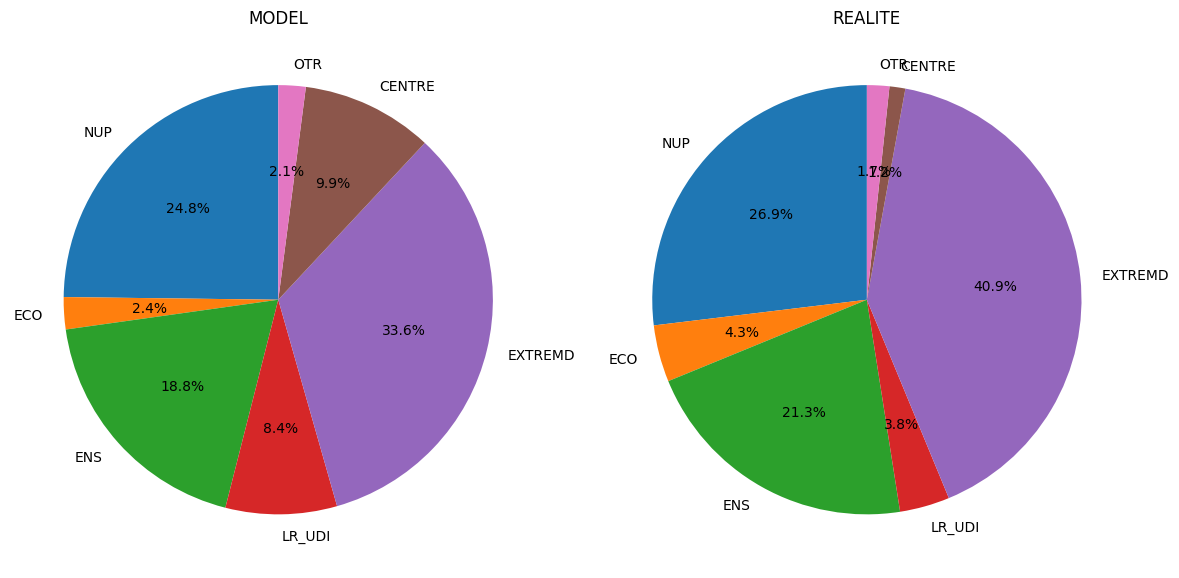

In [102]:
x = np.random.randint(len(y_test))
print ('X:',x)
print (df_infoC.iloc[x])
pred = multioutputregressor.predict([X_test_scaled[x]]) 
pred0.shape
for i in range (len(pred[0])) :
    print (y_column_names_list[i] , ':', pred[0][i], '>', y_test.iloc[x,i] ,' >>> ', pred[0][i] - y_test.iloc[x,i],' >>> ', (pred[0][i] - y_test.iloc[x,i])/pred[0][i])
    
values1 = pred[0]    
values2 = y_test.iloc[x]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart
axs[0].pie(values1, labels=y_column_names_list , autopct='%1.1f%%', startangle=90)
axs[0].set_title('MODEL')

# Plot the second pie chart
axs[1].pie(values2, labels=y_column_names_list, autopct='%1.1f%%', startangle=90)
axs[1].set_title('REALITE')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()    

# EXPORT INFO
## RESULATS

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
predFULL = best_estimator.predict(X_scaled) 
predFULL.shape

In [ ]:
# Convert the NumPy array to a Pandas DataFrame
df_result_to_export = pd.DataFrame(data=predFULL, index=y_index_list, columns=pred_column_names_list)
df_result_to_export.shape

In [ ]:
df_result_to_export.head(2)

## XGBoost_reg200_resultats_tbl

In [ ]:
tabl_export='XGBoost_reg200_resultats_tbl'
if tabl_export not in tbl_db_names :
    # Convert DataFrame to a SQL table, using the index as the ID column
    df_result_to_export.to_sql(tabl_export, con=engine, index=True, if_exists='replace')
    metadata.reflect(bind=engine)
tbl_db_names = metadata.tables.keys()
tbl_db_names

## feature_importances

In [371]:
feature_importance_df = pd.DataFrame()

# Iterate over each estimator in multioutputregressor
for i, estimator in enumerate(multioutputregressor.estimators_):
    # Get the feature importances and their indices
    importances = estimator.feature_importances_
    indices = importances.argsort()[::-1]  # Sort in descending order

    # Create column names based on the index i
    col_name_indice = f'estimator_{i}_indice'
    col_name_importance = f'estimator_{i}_importance'

    # Create a new column in the DataFrame for indices and importances
    feature_importance_df[col_name_indice] = indices
    feature_importance_df[col_name_importance] = importances[indices]

# Display the DataFrame
print(feature_importance_df)

     estimator_0_indice  estimator_0_importance  estimator_1_indice  \
0                    35                0.082898                 145   
1                   127                0.027993                 212   
2                   208                0.024794                 132   
3                   215                0.023977                 213   
4                   126                0.021999                 248   
..                  ...                     ...                 ...   
256                 105                0.000000                 113   
257                 100                0.000000                 114   
258                  99                0.000000                 115   
259                  97                0.000000                 116   
260                 116                0.000000                 155   

     estimator_1_importance  estimator_2_indice  estimator_2_importance  \
0                  0.087281                 119                0.077441 

In [ ]:
feature_importance_df = pd.DataFrame()

# Iterate over each estimator in multioutputregressor
for i, estimator in enumerate(best_estimator.estimators_):
    # Get the feature importances and their indices
    importances = estimator.feature_importances_
    indices = importances.argsort()[::-1]  # Sort in descending order

    # Create column names based on the index i
    col_name_indice = f'estimator_{i}_indice'
    col_name_importance = f'estimator_{i}_importance'

    # Create a new column in the DataFrame for indices and importances
    feature_importance_df[col_name_indice] = indices
    feature_importance_df[col_name_importance] = importances[indices]

# Display the DataFrame
print(feature_importance_df)

In [ ]:
feature_importance_df.head(2)

In [ ]:
column_mapping = []
for c in y_column_names_list:
    column_mapping.append(f'{c}_estim_indice')
    column_mapping.append(f'{c}_import')
len(column_mapping) , column_mapping

In [ ]:
feature_importance_df.rename(columns=dict(zip(feature_importance_df.columns, column_mapping)), inplace=True)
feature_importance_df.head(2)

## XGBoost_reg200_importance_tbl

In [ ]:
tabl_export='XGBoost_reg200_importance_tbl'
if tabl_export not in tbl_db_names :
    # Convert DataFrame to a SQL table, using the index as the ID column
    feature_importance_df.to_sql(tabl_export, con=engine, index=True, if_exists='replace')
    metadata.reflect(bind=engine)
tbl_db_names = metadata.tables.keys()
tbl_db_names

### TEST SQL preparation 
tables des colonnes

tables des resultats et delta

In [ ]:
connection = sqlite3.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Define the SQL query for the join
sql_query = """
SELECT 
    y.NUP, xg.pred_NUP, xg.pred_NUP-y.NUP AS delta_NUP,
    y.ECO, xg.pred_ECO, xg.pred_ECO-y.ECO AS delta_ECO,
    y.ENS, xg.pred_ENS, xg.pred_ENS-y.ENS AS delta_ENS,
    y.LR_UDI, xg.pred_LR_UDI, xg.pred_LR_UDI-y.LR_UDI AS delta_LR_UDI,
    y.EXTREMD, xg.pred_EXTREMD, xg.pred_EXTREMD-y.EXTREMD AS delta_EXTREMD,
    y.CENTRE, xg.pred_CENTRE, xg.pred_CENTRE-y.CENTRE AS delta_CENTRE,
    y.OTR, xg.pred_OTR, xg.pred_OTR-y.OTR AS delta_OTR
FROM y_resultats200_tbl AS y
JOIN XGBoost_reg200_resultats_tbl AS xg
ON y.key = xg.key;
"""

# Execute the SQL query and fetch the result into a DataFrame
result_df = pd.read_sql_query(sql_query, connection)

# Display the result DataFrame
result_df.head(2)

In [ ]:
# X_col_titr
connection = sqlite3.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Define the SQL query for the join
sql_query = """
SELECT *
FROM X_col_titr LIMIT 500
"""

# Execute the SQL query and fetch the result into a DataFrame
test_df = pd.read_sql_query(sql_query, connection)

# Display the result DataFrame
print(test_df)

In [ ]:
connection = sqlite3.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Define the SQL query for the join
sql_query = """
SELECT 
    NUP_titr.titr_col_value AS NUP_est, FI.NUP_import * 100 AS NUP_import,
    ECO_titr.titr_col_value AS ECO_est, FI.ECO_import * 100 AS ECO_import,
    ENS_titr.titr_col_value AS ENS_est, FI.ENS_import * 100 AS ENS_import,
    LR_UDI_titr.titr_col_value AS LR_UDI_est, FI.LR_UDI_import * 100 AS LR_UDI_import,
    EXTREMD_titr.titr_col_value AS EXTREMD_est, FI.EXTREMD_import * 100 AS EXTREMD_import,
    CENTRE_titr.titr_col_value AS CENTRE_est, FI.CENTRE_import * 100 AS CENTRE_import,
    OTR_titr.titr_col_value AS OTR_est, FI.OTR_import * 100 AS OTR_import
FROM 
    XGBoost_reg200_importance_tbl FI
    JOIN X_col_titr AS NUP_titr ON NUP_titr.indice = FI.NUP_estim_indice
    JOIN X_col_titr AS ECO_titr ON ECO_titr.indice = FI.ECO_estim_indice
    JOIN X_col_titr AS ENS_titr ON ENS_titr.indice = FI.ENS_estim_indice
    JOIN X_col_titr AS LR_UDI_titr ON LR_UDI_titr.indice = FI.LR_UDI_estim_indice
    JOIN X_col_titr AS EXTREMD_titr ON EXTREMD_titr.indice = FI.EXTREMD_estim_indice
    JOIN X_col_titr AS CENTRE_titr ON CENTRE_titr.indice = FI.CENTRE_estim_indice
    JOIN X_col_titr AS OTR_titr ON OTR_titr.indice = FI.OTR_estim_indice
LIMIT 100;
"""

# Execute the SQL query and fetch the result into a DataFrame
test_df = pd.read_sql_query(sql_query, connection)

# Display the result DataFrame
test_df.head(5)